In [10]:
# Import all required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots inside the notebook
%matplotlib inline


In [12]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [13]:
# Load your dataset
df = pd.read_excel("/workspaces/Independent_study_Time_series_analysis/AAPL_two_years.xlsx")

# Show first few rows to verify data loaded correctly
df.head()


,Date,Open,High,Low,Close,Volume,Ticker,Company,SMA_20,EMA_20,RSI_14,BB_Middle,BB_Upper,BB_Lower
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# The dataset contains multiple stock symbols (A and AAPL)
# We filter only the AAPL rows
aapl = df[df["Ticker"] == "AAPL"].copy()

# Convert the date column to datetime format (if not already)
aapl["Date"] = pd.to_datetime(aapl["Date"])

# Sort by date to ensure correct time order
aapl = aapl.sort_values("Date")

aapl.head()


,Date,Open,High,Low,Close,Volume,Ticker,Company,SMA_20,EMA_20,RSI_14,BB_Middle,BB_Upper,BB_Lower
485,2023-11-17,188.652815,188.781729,186.986926,188.097519,50922700.0,AAPL,Apple Inc.,177.054935,179.608793,88.238268,177.054935,192.114588,161.995281
486,2023-11-20,188.295812,190.298857,188.285901,189.842712,46505100.0,AAPL,Apple Inc.,177.980976,180.583452,88.797342,177.980976,193.814158,162.147794
487,2023-11-21,189.803075,189.912153,188.147097,189.039536,38134500.0,AAPL,Apple Inc.,178.845071,181.388793,84.410260,178.845071,195.128123,162.562018
488,2023-11-22,189.882415,191.310313,189.227952,189.703918,39617700.0,AAPL,Apple Inc.,179.858249,182.180710,82.301873,179.858249,196.198962,163.517536
489,2023-11-24,189.267591,189.297338,187.661196,188.375153,24048300.0,AAPL,Apple Inc.,181.013448,182.770657,80.729642,181.013448,196.240883,165.786012


In [15]:
# SMA: Simple Moving Average
# It smooths the price by averaging the last N days
# window=14 is common but you can change
aapl["SMA_14"] = aapl["Close"].rolling(window=14).mean()

aapl.head()


,Date,Open,High,Low,Close,Volume,Ticker,Company,SMA_20,EMA_20,RSI_14,BB_Middle,BB_Upper,BB_Lower,SMA_14
485,2023-11-17,188.652815,188.781729,186.986926,188.097519,50922700.0,AAPL,Apple Inc.,177.054935,179.608793,88.238268,177.054935,192.114588,161.995281,NaN
486,2023-11-20,188.295812,190.298857,188.285901,189.842712,46505100.0,AAPL,Apple Inc.,177.980976,180.583452,88.797342,177.980976,193.814158,162.147794,NaN
487,2023-11-21,189.803075,189.912153,188.147097,189.039536,38134500.0,AAPL,Apple Inc.,178.845071,181.388793,84.410260,178.845071,195.128123,162.562018,NaN
488,2023-11-22,189.882415,191.310313,189.227952,189.703918,39617700.0,AAPL,Apple Inc.,179.858249,182.180710,82.301873,179.858249,196.198962,163.517536,NaN
489,2023-11-24,189.267591,189.297338,187.661196,188.375153,24048300.0,AAPL,Apple Inc.,181.013448,182.770657,80.729642,181.013448,196.240883,165.786012,NaN


In [16]:
# EMA: Exponential Moving Average
# Faster reaction to new price changes
# span=14 is common
aapl["EMA_14"] = aapl["Close"].ewm(span=14, adjust=False).mean()

aapl.head()

,Date,Open,High,Low,Close,Volume,Ticker,Company,SMA_20,EMA_20,RSI_14,BB_Middle,BB_Upper,BB_Lower,SMA_14,EMA_14
485,2023-11-17,188.652815,188.781729,186.986926,188.097519,50922700.0,AAPL,Apple Inc.,177.054935,179.608793,88.238268,177.054935,192.114588,161.995281,NaN,188.097519
486,2023-11-20,188.295812,190.298857,188.285901,189.842712,46505100.0,AAPL,Apple Inc.,177.980976,180.583452,88.797342,177.980976,193.814158,162.147794,NaN,188.330211
487,2023-11-21,189.803075,189.912153,188.147097,189.039536,38134500.0,AAPL,Apple Inc.,178.845071,181.388793,84.410260,178.845071,195.128123,162.562018,NaN,188.424788
488,2023-11-22,189.882415,191.310313,189.227952,189.703918,39617700.0,AAPL,Apple Inc.,179.858249,182.180710,82.301873,179.858249,196.198962,163.517536,NaN,188.595339
489,2023-11-24,189.267591,189.297338,187.661196,188.375153,24048300.0,AAPL,Apple Inc.,181.013448,182.770657,80.729642,181.013448,196.240883,165.786012,NaN,188.565981


In [17]:
# RSI: Measures speed/strength of price movements
# Steps:
# 1. Compute price change
# 2. Separate gains and losses
# 3. Compute average gains and losses
# 4. RSI = 100 - (100 / (1 + RS))

# Step 1: Price change
delta = aapl["Close"].diff()

# Step 2: Gains and losses
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# Step 3: Use EMA to compute average gain/loss (more stable)
avg_gain = gain.ewm(span=14, adjust=False).mean()
avg_loss = loss.ewm(span=14, adjust=False).mean()

# Step 4: Compute RSI
RS = avg_gain / avg_loss
aapl["RSI_14"] = 100 - (100 / (1 + RS))

aapl.head()


,Date,Open,High,Low,Close,Volume,Ticker,Company,SMA_20,EMA_20,RSI_14,BB_Middle,BB_Upper,BB_Lower,SMA_14,EMA_14
485,2023-11-17,188.652815,188.781729,186.986926,188.097519,50922700.0,AAPL,Apple Inc.,177.054935,179.608793,NaN,177.054935,192.114588,161.995281,NaN,188.097519
486,2023-11-20,188.295812,190.298857,188.285901,189.842712,46505100.0,AAPL,Apple Inc.,177.980976,180.583452,100.000000,177.980976,193.814158,162.147794,NaN,188.330211
487,2023-11-21,189.803075,189.912153,188.147097,189.039536,38134500.0,AAPL,Apple Inc.,178.845071,181.388793,93.387822,178.845071,195.128123,162.562018,NaN,188.424788
488,2023-11-22,189.882415,191.310313,189.227952,189.703918,39617700.0,AAPL,Apple Inc.,179.858249,182.180710,93.780346,179.858249,196.198962,163.517536,NaN,188.595339
489,2023-11-24,189.267591,189.297338,187.661196,188.375153,24048300.0,AAPL,Apple Inc.,181.013448,182.770657,82.481002,181.013448,196.240883,165.786012,NaN,188.565981


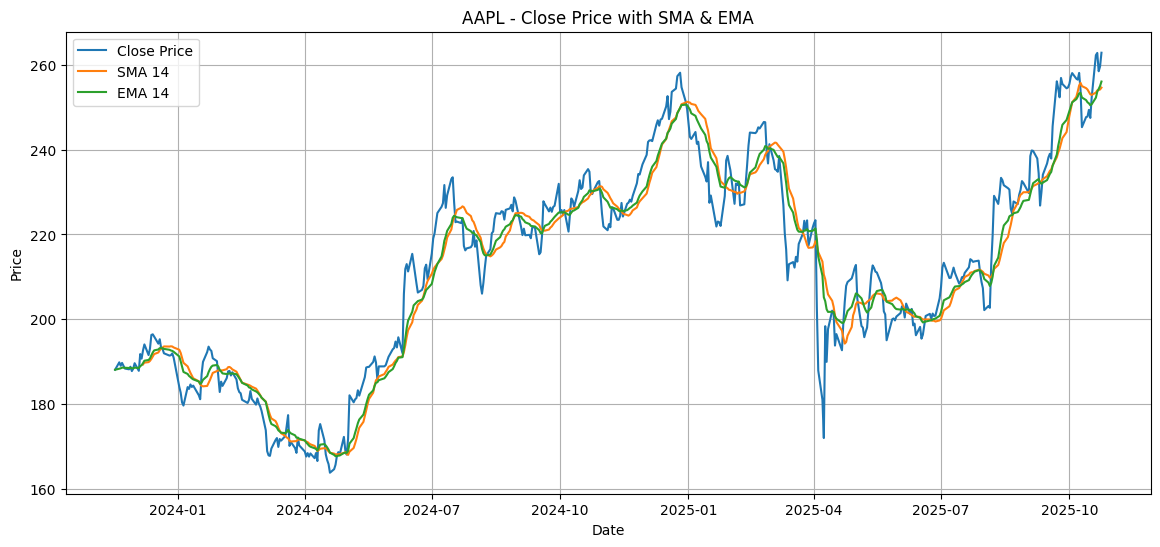

In [18]:
plt.figure(figsize=(14,6))
plt.plot(aapl["Date"], aapl["Close"], label="Close Price")
plt.plot(aapl["Date"], aapl["SMA_14"], label="SMA 14")
plt.plot(aapl["Date"], aapl["EMA_14"], label="EMA 14")

plt.title("AAPL - Close Price with SMA & EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

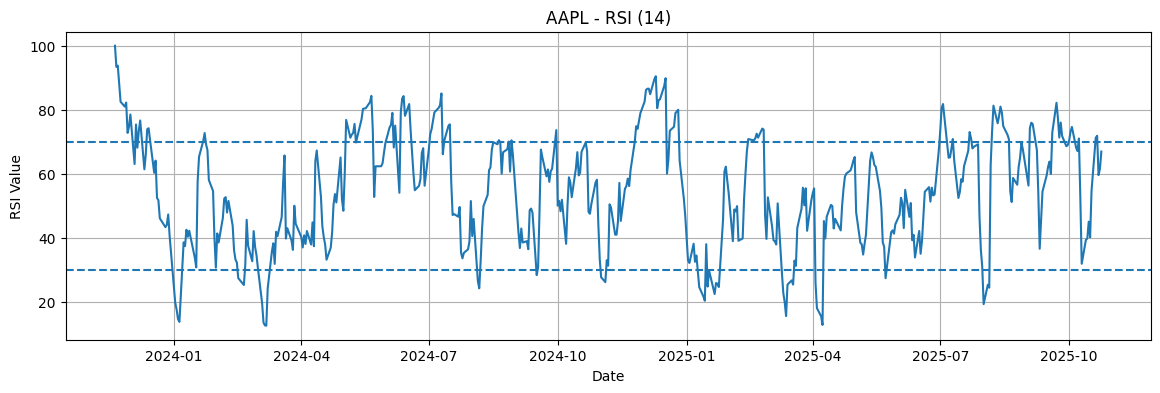

In [19]:
plt.figure(figsize=(14,4))
plt.plot(aapl["Date"], aapl["RSI_14"], label="RSI 14")

# Horizontal reference lines
plt.axhline(70, linestyle="--")
plt.axhline(30, linestyle="--")

plt.title("AAPL - RSI (14)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.grid(True)
plt.show()

In [20]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import MinMaxScaler

In [21]:
features_df = aapl[["Close", "SMA_14", "EMA_14", "RSI_14"]].dropna()

features_df.head()
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features_df.values)

scaled_features[:5]

array([[-0.41784828, -0.51377855, -0.50358916,  0.56161082],
       [-0.38900011, -0.50405435, -0.49020551,  0.64544774],
       [-0.43968423, -0.50125984, -0.48618207,  0.25384089],
       [-0.40903331, -0.4946855 , -0.47811371,  0.37477938],
       [-0.34392557, -0.48394366, -0.46138952,  0.57508866]])

In [22]:
# ------------------------------------------------------------
# Custom Dataset for Time-Series Sequences
# ------------------------------------------------------------
class TimeSeriesDataset(Dataset):
    """
    Converts multivariate time-series data into sequences suitable for RNN input.
    """
    def __init__(self, features: np.ndarray, lookback: int, target_index: int = 0):
        self.data_tensor = torch.tensor(features, dtype=torch.float32)
        self.lookback = lookback
        self.target_index = target_index

        # Total number of training samples
        self.num_samples = len(features) - lookback

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        # Input sequence (lookback, num_features)
        x = self.data_tensor[idx : idx + self.lookback]

        # Target is Close price at next step
        y = self.data_tensor[idx + self.lookback, self.target_index].unsqueeze(0)

        return x, y


In [23]:
# ------------------------------------------------------------
# Time-aware train-test split (80% train, 20% test)
# ------------------------------------------------------------

LOOKBACK = 20   # number of days used in each sequence
TEST_SPLIT = 0.2

test_size = int(len(scaled_features) * TEST_SPLIT)

train_data = scaled_features[:-test_size]
test_data = scaled_features[-test_size - LOOKBACK:]  # ensure enough past data

train_dataset = TimeSeriesDataset(train_data, LOOKBACK)
test_dataset = TimeSeriesDataset(test_data, LOOKBACK)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check one batch
X_example, y_example = next(iter(train_loader))
X_example.shape, y_example.shape


(torch.Size([32, 20, 4]), torch.Size([32, 1]))

In [24]:
# ------------------------------------------------------------
# Basic RNN Architecture from your reference formula:
#
#   h_t = tanh(W_hh * h_{t-1} + W_xh * x_t + b_h)
#
# PyTorch nn.RNN handles this internally.
# ------------------------------------------------------------
class SimpleRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super().__init__()

        self.hidden_size = hidden_size

        # Basic RNN Layer
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True  # (batch, seq_len, features)
        )

        # Fully connected layer to map hidden state → prediction
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # RNN output -> (batch, seq_len, hidden_size)
        rnn_out, _ = self.rnn(x)

        # Use last time step hidden state
        last_output = rnn_out[:, -1, :]

        # Predict Close price
        out = self.fc(last_output)
        return out


In [25]:
# ------------------------------------------------------------
# Define model size
# ------------------------------------------------------------
N_FEATURES = features_df.shape[1]  # Close, SMA_14, EMA_14, RSI_14
HIDDEN_SIZE = 32
OUTPUT_SIZE = 1   # predict next Close value

model = SimpleRNNModel(
    input_size=N_FEATURES,
    hidden_size=HIDDEN_SIZE,
    output_size=OUTPUT_SIZE
)

print("Model Summary:")
print(model)
print("\nExample batch shape:", X_example.shape)


Model Summary:
SimpleRNNModel(
  (rnn): RNN(4, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

Example batch shape: torch.Size([32, 20, 4])


In [26]:
# ------------------------------------------------------------
# Loss function and optimizer
# ------------------------------------------------------------
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 20


In [27]:
# ------------------------------------------------------------
# Basic Training Loop for RNN
# ------------------------------------------------------------
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        preds = model(X_batch)

        # Compute loss
        loss = loss_fn(preds, y_batch)

        # Backward pass
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {epoch_loss:.4f}")


Epoch 1/20 - Loss: 2.8772
Epoch 2/20 - Loss: 1.4608
Epoch 3/20 - Loss: 0.5748
Epoch 4/20 - Loss: 0.2448
Epoch 5/20 - Loss: 0.1834
Epoch 6/20 - Loss: 0.1615
Epoch 7/20 - Loss: 0.1509
Epoch 8/20 - Loss: 0.1411
Epoch 9/20 - Loss: 0.1348
Epoch 10/20 - Loss: 0.1299
Epoch 11/20 - Loss: 0.1251
Epoch 12/20 - Loss: 0.1209
Epoch 13/20 - Loss: 0.1174
Epoch 14/20 - Loss: 0.1143
Epoch 15/20 - Loss: 0.1115
Epoch 16/20 - Loss: 0.1091
Epoch 17/20 - Loss: 0.1070
Epoch 18/20 - Loss: 0.1051
Epoch 19/20 - Loss: 0.1035
Epoch 20/20 - Loss: 0.1020
